In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/machine_downtime_dataset.csv')
df.head()

,Machine_ID,Temperature,Run_Time,Downtime_Flag
0,1,84.48,1154,0
1,2,80.67,127,0
2,3,80.99,368,0
3,4,91.60,13,0
4,5,88.30,885,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Machine_ID     10000 non-null  int64  
 1   Temperature    10000 non-null  float64
 2   Run_Time       10000 non-null  int64  
 3   Downtime_Flag  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [21]:
df.describe()

,Machine_ID,Temperature,Run_Time,Downtime_Flag
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,80.067839,611.073800,0.149500
std,2886.89568,9.898371,343.094065,0.356598
min,1.00000,50.000000,10.000000,0.000000
25%,2500.75000,73.380000,316.000000,0.000000
50%,5000.50000,80.140000,616.000000,0.000000
75%,7500.25000,86.762500,907.000000,0.000000
max,10000.00000,114.670000,1200.000000,1.000000


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df[['Machine_ID', 'Temperature', 'Run_Time']]
y = df['Downtime_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy: 0.877

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1696
           1       0.59      0.61      0.60       304

    accuracy                           0.88      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.88      0.88      0.88      2000



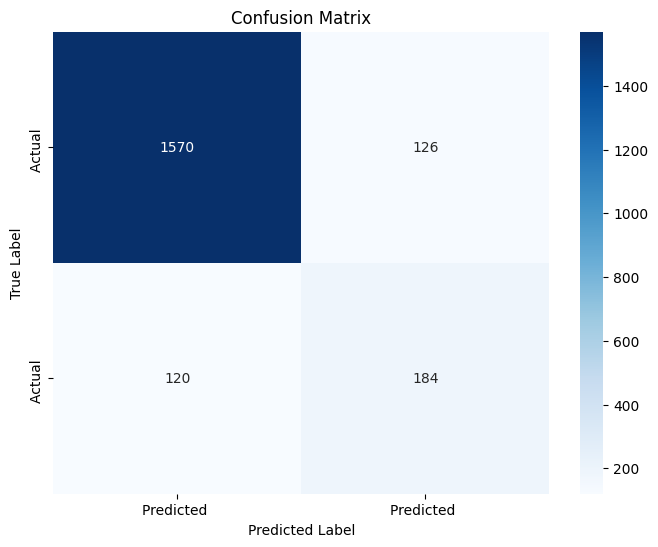

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted ', 'Predicted '],
            yticklabels=['Actual ', 'Actual '])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')

print("Model saved as 'logistic_regression_model.pkl'")


Model saved as 'logistic_regression_model.pkl'
